# Аналитика данных с помощью pandas и matplotlib

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.

 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация по matplotlib](https://matplotlib.org/index.html)

## 1. Данные

Начнем с необходимых приготовлений.

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
import mplfinance
import datetime
import matplotlib.dates as mdates


%matplotlib inline
#plt.style.use('seaborn-whitegrid')

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [4]:
coins = pd.read_csv("coins.csv")

Посмотрим что получилось

In [5]:
coins.head()

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07
4,2013-04-30,144.00,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.00,146.93,134.05,139.00,0.0,1.597780e+09


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
1. Сколько всего различных монет представлено в датасете?
2. За какой период данные мы имеем?
3. Есть ли пропуски в данных?
4. У какой монеты и когда была самая высокая цена?
5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями.

In [6]:
coins['symbol'].value_counts()

BTC      1866
LTC      1866
DOGE     1635
VTC      1599
DGB      1582
         ... 
ZIL       133
POLY      125
CENNZ      86
LOOM       85
CTXC       52
Name: symbol, Length: 66, dtype: int64

In [7]:
print(coins['date'].min())
print(coins['date'].max())

2013-04-28
2018-06-06


In [8]:
print(coins.isnull())
print(len(coins))
print(len(coins.dropna()))
len(coins) != len(coins.dropna())

        date  price  txCount  txVolume  activeAddresses  symbol   name   open  \
0      False  False    False     False            False   False  False  False   
1      False  False    False     False            False   False  False  False   
2      False  False    False     False            False   False  False  False   
3      False  False    False     False            False   False  False  False   
4      False  False    False     False            False   False  False  False   
...      ...    ...      ...       ...              ...     ...    ...    ...   
37583  False  False    False     False            False   False  False  False   
37584  False  False    False     False            False   False  False  False   
37585  False  False    False     False            False   False  False  False   
37586  False  False    False     False            False   False  False  False   
37587  False  False    False     False            False   False  False  False   

        high    low  close 

True

In [9]:
coins[['price', 'date', 'symbol']].max(axis = 0)

price        19475.8
date      2018-06-06
symbol           ZRX
dtype: object

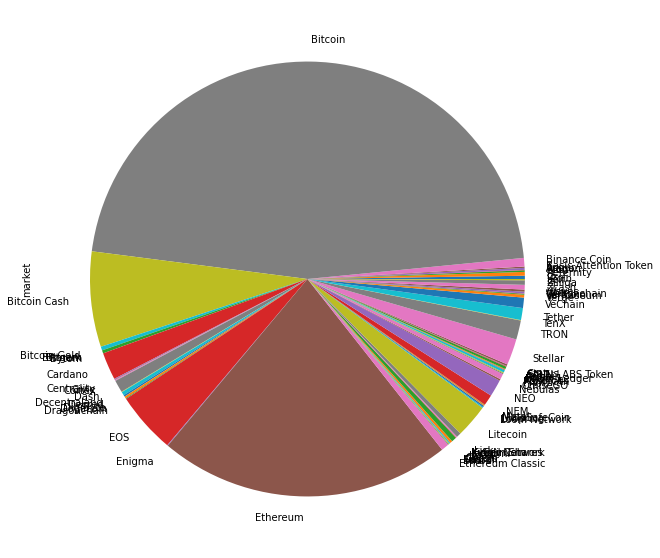

In [10]:
coins.groupby(['name']).last()['market'].plot.pie(y='market', figsize=(10,10))

## 2. Визуализация

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [11]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    table = coins.loc[((coins['symbol'] == symbol) & (coins['date'] > start_date) & (coins['date'] < end_date)),
                      ['date', 'open', 'high', 'low', 'close']]
    fig = plt.figure(figsize =(50, 25))
    ax = plt.axes() 
    plt.xlabel('Date', size = 40)
    plt.ylabel('Price', size = 40)
    ax.grid(True)
    
    table['date'] = pd.to_datetime(table['date'])
    table["date"] = table["date"].apply(mdates.date2num)
    
    ohlc= table[['date', 'open', 'high', 'low','close']].copy()
    
    mpl_finance.candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    plt.show()
    pass

Посмотрим, что получилось:

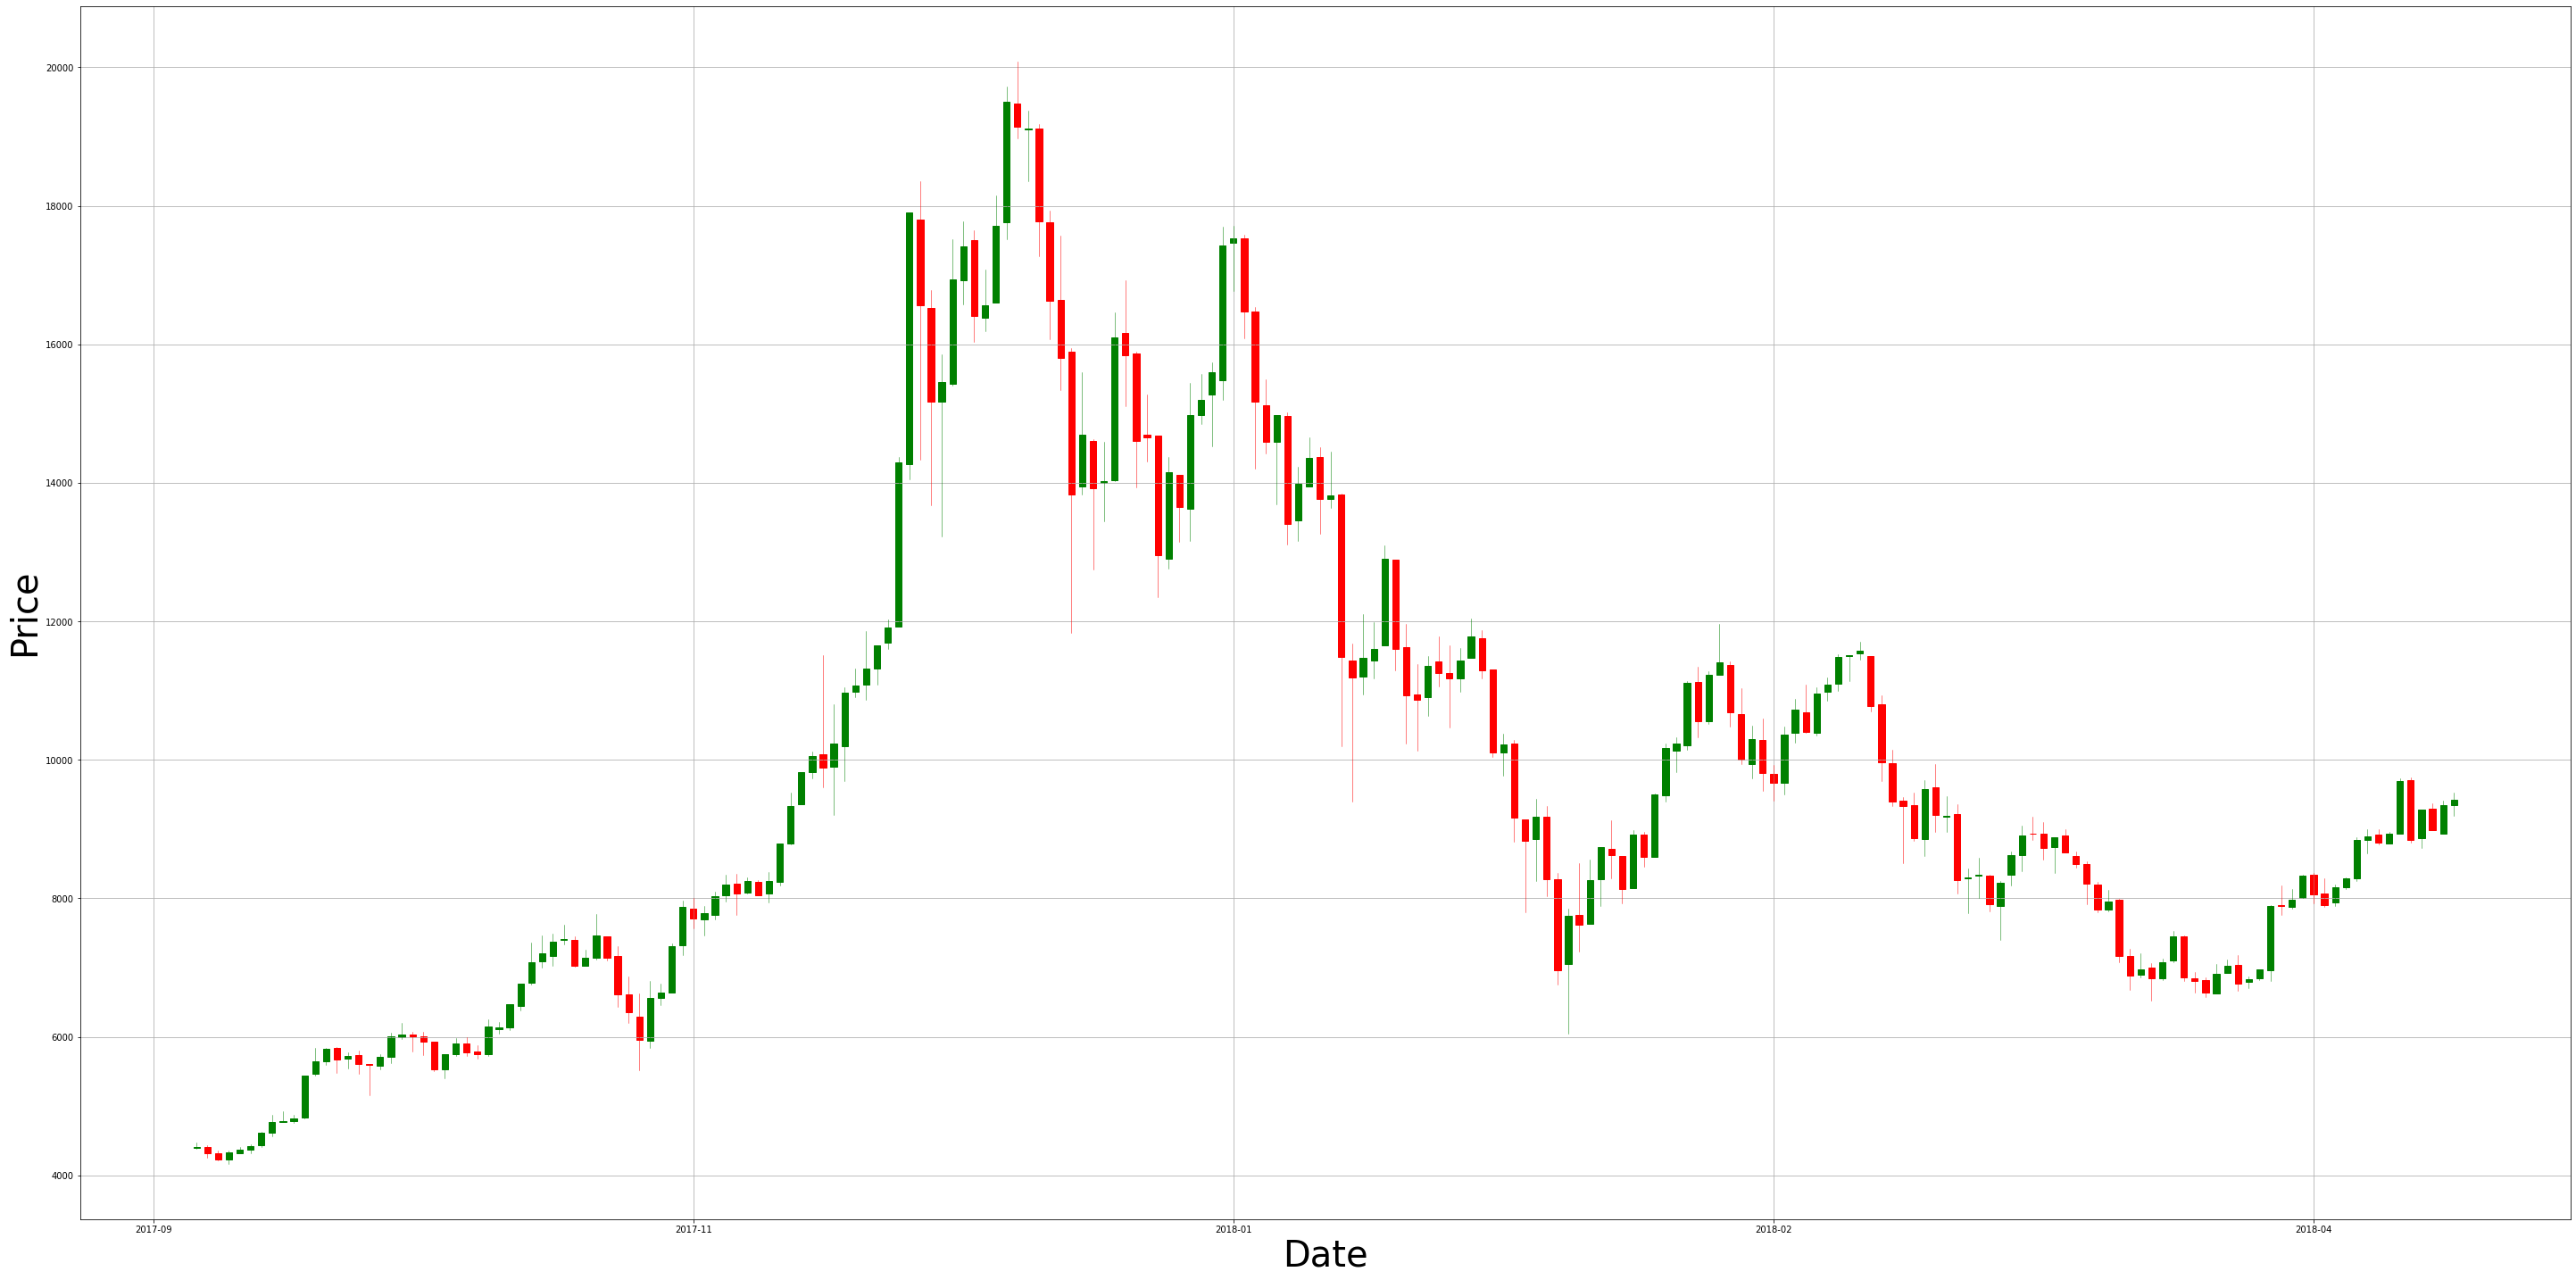

In [12]:
plot_fancy_price_action(coins=coins, symbol='BTC', start_date='2017-10-01', end_date='2018-04-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [13]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
        table = coins.loc[((coins['symbol'] == symbol) & (coins['date'] > start_date) & (coins['date'] < end_date)),
                      ['date', 'open', 'high', 'low', 'close']]
        table['pnd'] = table['high']/(table[['open', 'close']].max(axis = 1))
        
        print(table[['pnd', 'date']].max(axis = 0))

In [14]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

pnd        1.14289
date    2018-05-31
dtype: object


#### Сравните эти значения для разных монет.

## 4. Окупаемость инвестиций

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

In [15]:
def compute_roi(coins, investments, start_date, end_date):
    table_start = coins.loc[(coins['date'] == start_date), ['symbol', 'open']]
    table_end = coins.loc[(coins['date'] == end_date), ['symbol', 'open']]
    start_cost = 0
    finish_cost = 0
    
    for coin in investments:
        tmp_1 = table_start.loc[(table_start['symbol'] == coin), ['open']]
        start_cost += float(tmp_1['open'])
        tmp_2 = table_end.loc[(table_end['symbol'] == coin), ['open']]
        finish_cost += float(tmp_2['open'])
    
    print((finish_cost - start_cost)/start_cost)
    
    pass

In [16]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2017-04-04', end_date='2018-06-01')

5.604079262161507


## 5. Технический анализ

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение на N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [17]:
def plot_bollinger_bands(coins, symbol, window, width):
    table = coins.loc[coins['symbol'] == symbol, ['price', 'date']]
    table['avg'] = table['price'].rolling(window).mean()
    table['std'] = table['price'].rolling(window).std()
    table['high_border'] = table['avg'] + width * table['std']
    table['low_border'] = table['avg'] - width * table['std']
    
    fig1 = plt.figure(figsize =(20, 10))
    ax1 = plt.axes() 
    plt.xlabel('Date', size = 40)
    plt.ylabel('Price', size = 40)
    ax1.grid(True)
    ax1.xaxis.set_major_locator(mpl.ticker.MaxNLocator(10))
    
    graphics = ['average', 'price', 'high_border', 'low_border']
    
    plt.plot(
    table['date'],  # абсциссы точек
    table['avg'], # ординаты точек
    color = 'black'
    )
    ax1.legend(graphics) 
    
    plt.plot(
    table['date'],  # абсциссы точек
    table['price'], # ординаты точек
    color = 'blue'
    )
    ax1.legend(graphics) 
    
    plt.plot(
    table['date'],  # абсциссы точек
    table['high_border'], # ординаты точек
    color = 'green'
    ) 
    ax1.legend(graphics) 
    
    plt.plot(
    table['date'],  # абсциссы точек
    table['low_border'], # ординаты точек
    color = 'red'
    )
    ax1.legend(graphics) 
    
    plt.show()
    
    pass

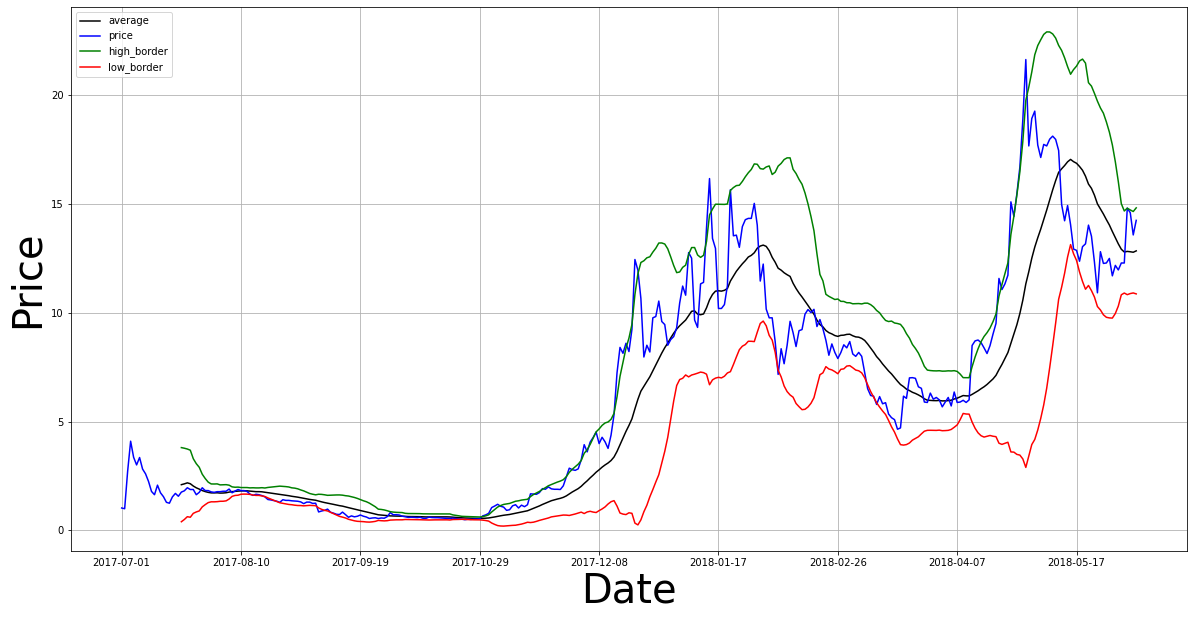

In [18]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

#### Сделайте вывод о том, выполнялось ли правило Боллинджера.

## 6. Капитализация как индикатор

Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [19]:
def plot_coins_capitalizations(coins, symbols, start_date):
    tables = []
    for symbol in symbols:
         tables.append(coins.loc[(coins['symbol'] == symbol) & (coins['date'] > start_date), ['symbol', 'date', 'market']])
    
    
    fig1 = plt.figure(figsize =(20, 10))
    ax1 = plt.axes() 
    plt.xlabel('Date', size = 40)
    plt.ylabel('Market', size = 40)
    ax1.grid(True)
    ax1.xaxis.set_major_locator(mpl.ticker.MaxNLocator(10))
    
    colors = ['red', 'blue', 
              'black', 'green', 
              'orange', 'purple']
    
    for i in range(len(tables)):
        plt.plot(
        tables[i]['date'],  # абсциссы точек
        tables[i]['market'], # ординаты точек
        color = colors[i]
        )
        ax1.legend(symbols) 
        
    plt.show()
    tmp = coins.groupby(coins.date).sum()['market']
    #coins['sum_market'] = coins.groupby(coins.date).sum()['market']
    
    rel_market = []
    
    for index, row in coins.iterrows():
        rel_market.append(row['market']/tmp[row['date']])
        
    coins['rel_market'] = [i for i in rel_market]
    
    
    fig2 = plt.figure(figsize =(20, 10)) 
    ax2 = plt.axes() 
    plt.xlabel('Date', size = 40) 
    plt.ylabel('Relative market', size = 40) 
    ax2.grid(True) 
    ax2.xaxis.set_major_locator(mpl.ticker.MaxNLocator(10)) 

    tables = []
    for symbol in symbols:
         tables.append(coins.loc[(coins['symbol'] == symbol) & (coins['date'] > start_date), 
                                 ['symbol', 'date', 'rel_market']])

    for j in range(len(tables)): 
        plt.plot( 
        tables[j]['date'], # абсциссы точек 
        tables[j]['rel_market'], # ординаты точек 
        color = colors[j] 
        ) 
        ax2.legend(symbols) 

    plt.show()
    pass

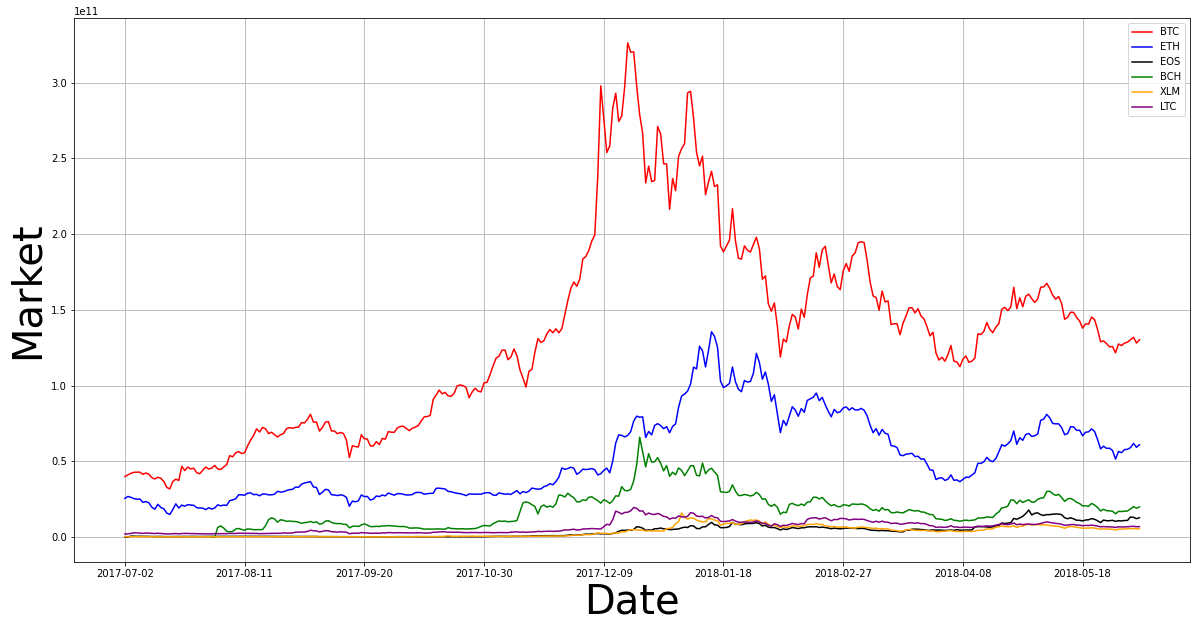

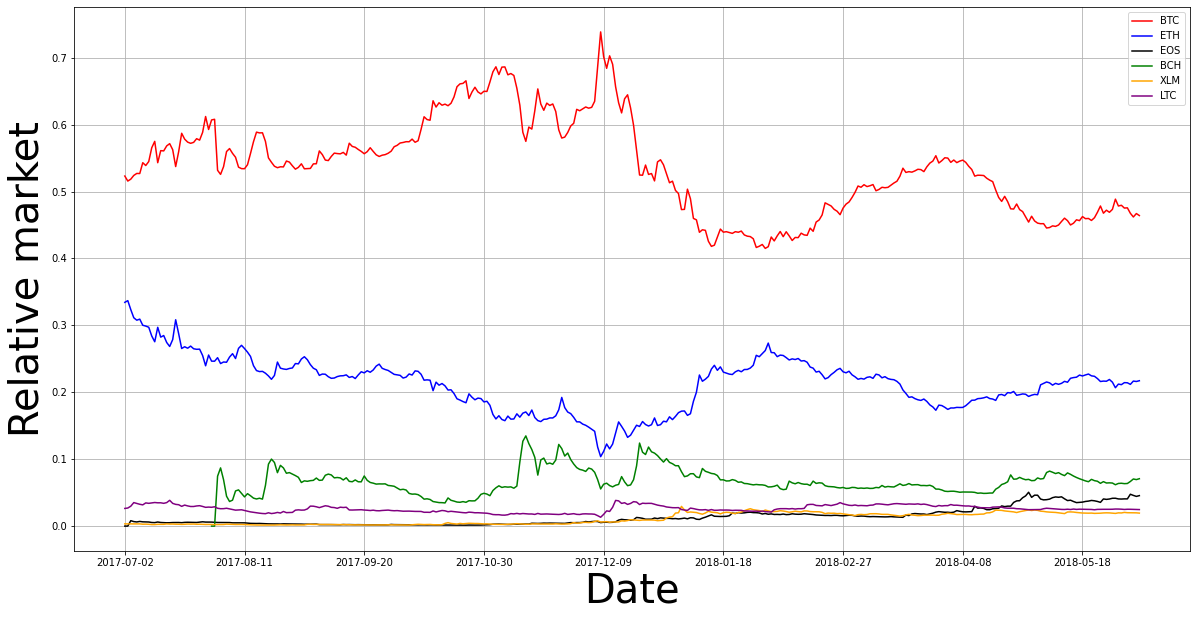

In [20]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

#### Проанализируйте зависимость доли капитализации альткойнов от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

## 7. Корреляции монет

#### Теперь нужно подробнее посмотреть на коррелиции средних капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

In [21]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    columns = []
    max_len = 0
    for i in range(len(symbols)):
        tmp = coins.loc[(coins['symbol'] == symbols[i]) & 
                        (coins['date'] < date), ['symbol', 'date', 'market']]
        columns.append(tmp['market'].rolling(window).mean().dropna())
        max_len = max(len(columns[i]), max_len)
    rows = []
    
    for i in range(max_len):
        row = []
        for j in range(len(columns)):
            if i < len(columns[j].values):
                row.append(columns[j].values[i])
        rows.append(row)
        
    df = pd.DataFrame(data=[row for row in rows], 
                      columns=[symbol for symbol in symbols])
    
    return df.corr()
    
    pass

In [22]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.09,0.13,-0.11,0.27,0.98,-0.03
ETH,-0.09,1.00,-0.20,-0.34,0.58,0.93,-0.06
EOS,0.13,-0.20,1.00,0.40,0.71,0.66,-0.15
BCH,-0.11,-0.34,0.40,1.00,-0.44,-0.05,0.16
XLM,0.27,0.58,0.71,-0.44,1.00,0.33,0.07
LTC,0.98,0.93,0.66,-0.05,0.33,1.00,0.00
ADA,-0.03,-0.06,-0.15,0.16,0.07,0.00,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [23]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.04,-0.28,-0.43,0.68,0.13,-0.83
ETH,-0.04,1.00,-0.18,-0.23,0.37,0.37,-0.69
EOS,-0.28,-0.18,1.00,0.20,0.76,-0.36,-0.91
BCH,-0.43,-0.23,0.20,1.00,-0.42,0.22,-0.69
XLM,0.68,0.37,0.76,-0.42,1.00,0.14,0.14
LTC,0.13,0.37,-0.36,0.22,0.14,1.00,0.09
ADA,-0.83,-0.69,-0.91,-0.69,0.14,0.09,1.00


## 8. Анализ одной стратегии

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия основанная на скользящих средних. Стратегия выглядит следующим образом: мы строим две скользящие стреднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае. Посмотрим на пример

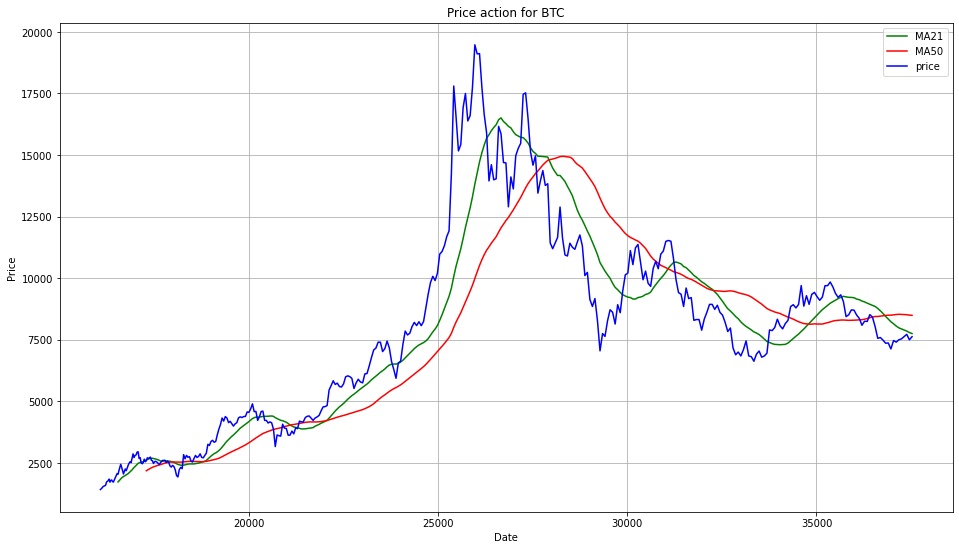

In [24]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins.loc[(coins['symbol'] == symbol)& (coins['date'] < end_date) & (coins['date'] > start_date)]    
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что для скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.
#### Реализуйте функцию, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании 

#### Notes:
Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод shift(1) у Series.
Разница цен закрытия за сегодня и за вчера - это мой multiplier за сегодняшний день. При этом давайте строить графики накопления для multipliers. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй- 0.5 и в третий 2. То график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
При этом, вы можете перейти от произведений к суммам используя log(today_price / yesterday_price). Затем просуммировав все значения через метод cumsum и применив к результату exp.

При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый threshold, либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [27]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    coins['date'] = pd.to_datetime(coins['date'])
    
    coin = coins.loc[(coins['symbol'] == symbol) & (coins['date'] < end_date) & (coins['date'] > start_date)]    
    price = coin['price']
    lead_mean = price.rolling(window=lead_window).mean()
    lag_mean = price.rolling(window=lag_window).mean()
    
    
    coin['inv_profit'] = [1.0 for i in range(len(coin))]
    coin['strategy_profit'] = [1.0 for i in range(len(coin))]
    
    
    for i in range(1, len(coin)):
        coef = coin['close'].values[i]/coin['close'].values[i - 1]
        coin['inv_profit'].values[i] = coin['inv_profit'].values[i - 1] * coef
    
    for i in range(1, len(coin)):
        last_price = coin['strategy_profit'].values[i - 1]
        if lead_mean.values[i] > lag_mean.values[i]:
            coef = coin['close'].values[i]/coin['close'].values[i - 1]
            coin['strategy_profit'].values[i] = last_price * coef
        else:
            coin['strategy_profit'].values[i] = last_price
        
    
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(lead_mean, color='green', label='MA{}'.format(lead_window))
    ax.plot(lag_mean, color='red', label='MA{}'.format(lag_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 
    
    fig1 = plt.figure(figsize=(16, 9))
    ax1 = plt.axes() 
    
    ax1.set_title('Profit fot {}'.format(symbol))
    ax1.plot(coin['inv_profit'], color='blue', label='inv_profit')
    ax1.plot(coin['strategy_profit'], color='red', label='strategy_profit')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Profit')
    ax1.legend(loc='best')
    ax1.grid(True)
    plt.show() 
    
    
    pass

In [31]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, 
    continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=list(pd.date_range('2013-04-28', '2018-06-06', freq='D')),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=list(pd.date_range('2013-04-28', '2018-06-06', freq='D')),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

<function __main__.plot_moving_averages_strategy>

#### Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели.
#### Вывод:
#### 1) На растущем рынке стратегия хуже обычных инвестиций (что вроде и так очевидно).
#### 2) На падающем рынке стратегия поможет разве что потерять не так много, но лучше тогда уж вообще воздержаться от торговли (возможное решение: шорты во время движения вниз). 
#### 3) Боковик не смог найти (потому что он обычно бывает внутри дня, тут большие временные промежутки)

## 9. Отказ от ответственности 
Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.

![Disclamer](https://i0.kym-cdn.com/entries/icons/mobile/000/024/785/Screen_Shot_2017-11-30_at_1.12.37_PM.jpg)